# Visualizing the distribution of dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
sns.set(color_codes=True)

In [ ]:
x = np.random.normal(size=100)

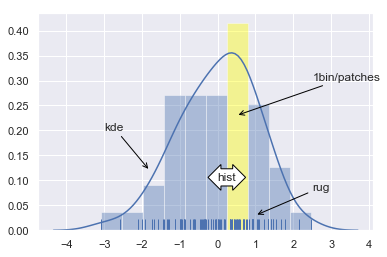

In [36]:
sns.distplot(x, hist=True, kde=True, rug=True)

arrowprops = dict(arrowstyle='->', color='black')
bboxprops = dict(
    boxstyle='darrow,pad=0.3', facecolor='white',
    linewidth=1, edgecolor='black'
)
ax = plt.gca()
ax.text(0, 0.1, 'hist', bbox=bboxprops)
# kernel density estimation
ax.annotate('kde', xy=(-1.8, 0.12), xytext=(-3, 0.2),
            arrowprops=arrowprops)
ax.annotate('rug', xy=(1, 0.03), xytext=(2.5, 0.08),
            arrowprops=arrowprops)
ax.patches[6].set_facecolor('yellow')
ax.annotate('1bin/patches', xy=(0.5, 0.23), xytext=(2.5, 0.3),
            arrowprops=arrowprops)

plt.show()

# Plotting bivariate distributions

- `jointplot` multi-panel figure

In [37]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=['x', 'y'])

In [39]:
df.head()

,x,y
0,1.012749,1.730258
1,-1.651093,1.790956
2,1.104785,1.996380
3,0.394400,1.030348
4,0.690871,0.412235


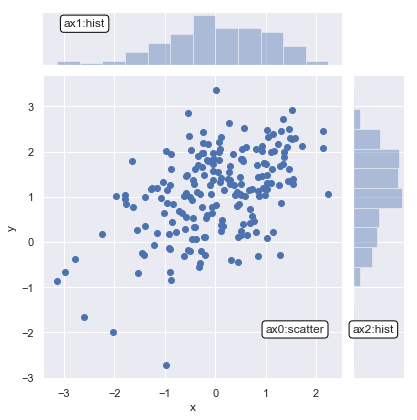

In [61]:
sns.jointplot(x='x', y='y', data=df)
axs = plt.gcf().get_axes()
bboxprops=dict(
    boxstyle='round,pad=.3',
    facecolor='white',
    edgecolor='black'
)

axs[0].text(1, -2, 'ax0:scatter', bbox=bboxprops)
axs[1].text(-3, 30, 'ax1:hist', bbox=bboxprops)
axs[2].text(0, -2, 'ax2:hist', bbox=bboxprops)
plt.show()

# Aggregation and representing uncertainty

In [65]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


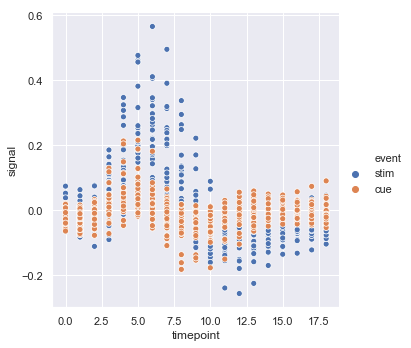

In [77]:
sns.relplot(
    x='timepoint',
    y='signal',
    hue='event',
    estimator=None,
    data=fmri
)

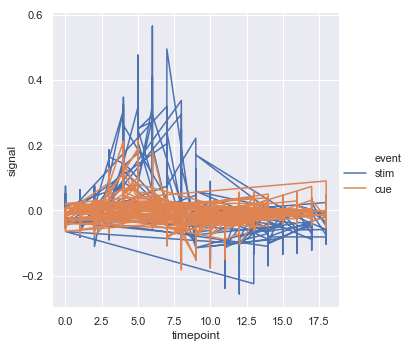

In [78]:
sns.relplot(
    x='timepoint',
    y='signal',
    kind='line',
    hue='event',
    estimator=None,
    sort=False,
    data=fmri
)

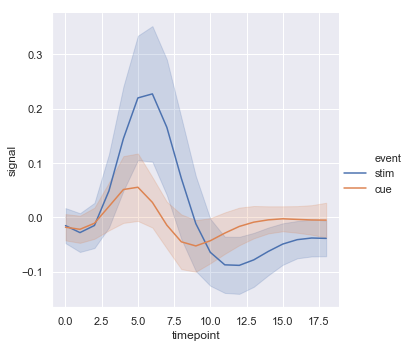

In [85]:
# ci: confidence interval
sns.relplot(
    x='timepoint',
    y='signal',
    kind='line',
    ci='sd',
    hue='event',
    data=fmri
)

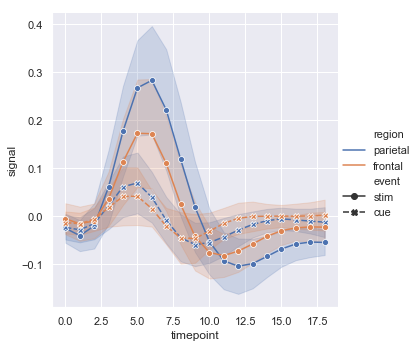

In [90]:
sns.relplot(
    x='timepoint',
    y='signal',
    hue='region',
    style='event',
    markers=True,
    dashes=True,
    kind='line',
    ci='sd',
    data=fmri,
)

In [93]:
# query filter fmri[fmri['event'] == 'stim'] equivalent
fmri.query('event=="stim"').head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


# plotting with date data

In [94]:
df = pd.DataFrame(dict(
    time=pd.date_range('2017-1-1', periods=500),
    value=np.random.randn(500).cumsum()
))

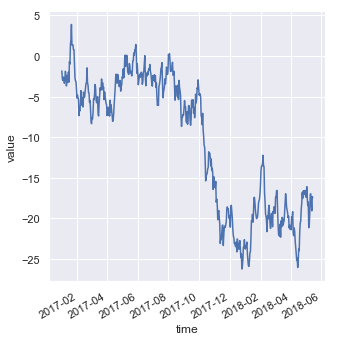

In [98]:
sns.relplot(x='time', y='value', kind='line', data=df)
fig = plt.gcf()
# auto format xdate
fig.autofmt_xdate()

# Visualizing statistical relationships

- `relplot(scatter, line)`, `distplot(histogram)`, `jointplot`
- `hue`: categorical legend
- date autoformat
